In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Matplotlib created a temporary cache directory at C:\Users\Dell\AppData\Local\Temp\matplotlib-e_tobcwe because the default path (C:\Users\Dell\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('data/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.select_dtypes(include='object').nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [8]:
object_columns = data.select_dtypes(include='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in object_columns.columns:
    data[col] = encoder.fit_transform(data[col])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


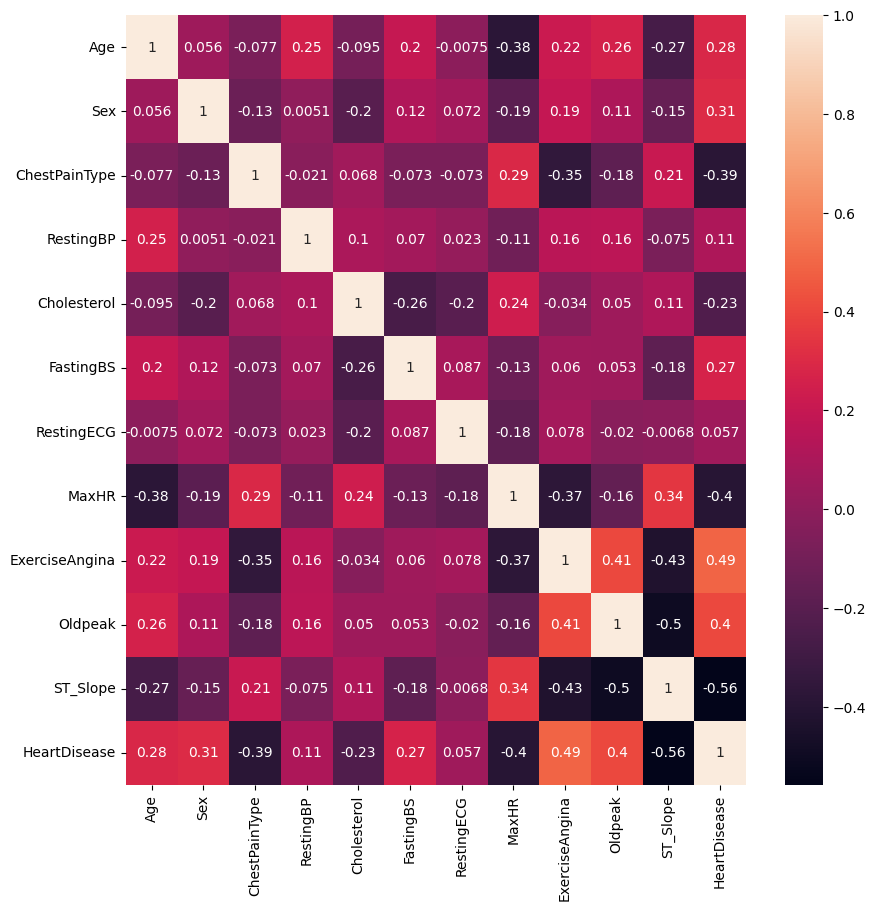

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [17]:
data['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [18]:
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
model = SVC()

params = {
    'C':[.1 , 0.01 , 1 , 10 , 100],
    'kernel':['linear','poly','rbf'],
    'gamma':['auto','scale']
}

grid_search = GridSearchCV(model, params, scoring='accuracy', cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 10, 100],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [22]:
grid_search.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [23]:
model = SVC(C=1, gamma='auto', kernel='rbf')
model.fit(x_train, y_train)

SVC(C=1, gamma='auto')

In [24]:
x_train_pred = model.predict(x_train)
predictions = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(x_train_pred, y_train)

0.8991825613079019

In [26]:
accuracy_score(predictions, y_test)

0.8641304347826086